In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, rospy, rosbag, glob, re, math

import scipy
import scipy.stats
from scipy.stats import pearsonr

from smap.msg import smapStats

from IPython.display import HTML, display

from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import cm
from numpy import linspace
from matplotlib.colors import LogNorm
from decimal import *

replanning/ucb0_1.bag 78
2
replanning/ucb1_1.bag 85
3
replanning/ucb2_1.bag 85
3


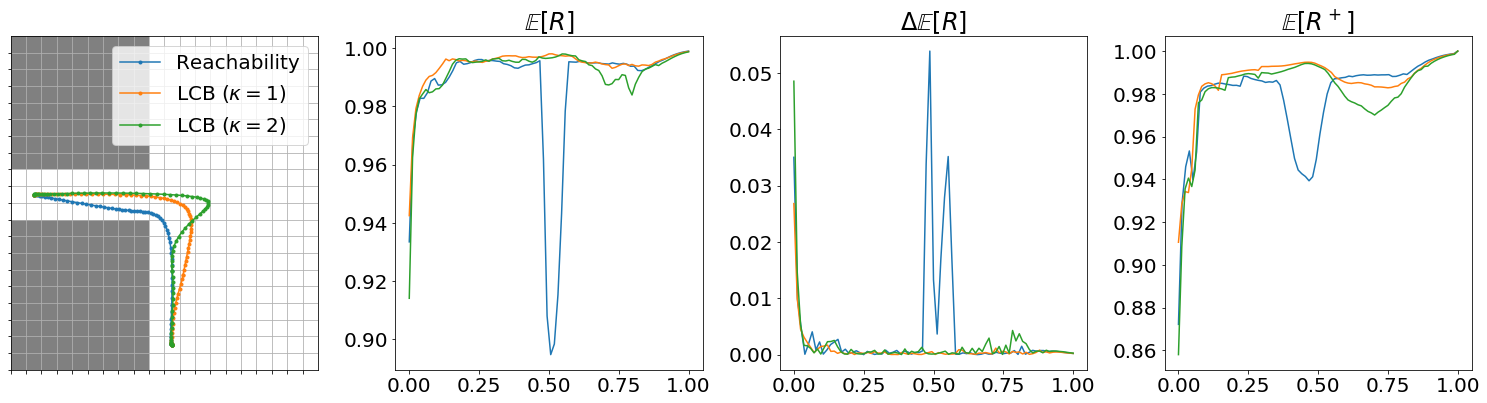

In [172]:
%matplotlib inline

getcontext().prec = 1024

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

fig, ((ax1, ax2, ax4, ax5)) = plt.subplots(1,4, figsize=(21, 6))
# fig.suptitle("Replanning evaluation")

verts1 = [
    (-1, -1), # left, bottom
    (-1, -.1), # left, top
    (-.1, -.1), # right, top
    (-.1, -1), # right, bottom
    (0., 0.), # ignored
]

verts2 = [
    (-1, .2), # left, bottom
    (-1, 1), # left, top
    (-.1, 1), # right, top
    (-.1, .2), # right, bottom
    (0., 0.), # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

ax1.add_patch(patches.PathPatch(Path(verts1, codes), facecolor='grey', lw=0))
ax1.add_patch(patches.PathPatch(Path(verts2, codes), facecolor='grey', lw=0))
ax1.set_xticks(np.arange(-1,1,0.1))
ax1.set_yticks(np.arange(-1,1,0.1))
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.grid()

# ax10.add_patch(patches.PathPatch(Path(verts1, codes), facecolor='grey', lw=0))
# ax10.add_patch(patches.PathPatch(Path(verts2, codes), facecolor='grey', lw=0))
# ax10.set_xticks(np.arange(-1,1,0.1))
# ax10.set_yticks(np.arange(-1,1,0.1))
# ax10.set_xlim([-1, 1])
# ax10.set_ylim([-1, 1])
# ax10.grid()

filenames = sorted(glob.glob("replanning/*.bag"))


cm_subsection = linspace(0, 1, len(filenames))
# colors = [cm.jet(x) for x in cm_subsection]

def plot_spline(ax, stats, name, rnd, random_color=False):
    if "ucb0_" in name:
        name = "Reachability"
    else:
        k = re.findall("ucb([0-9.]+)_", name)[0]
        name = "LCB ($\kappa=%s$)" % k
    if random_color:
        ax.plot(stats.trajectoryX, stats.trajectoryY, '.-', label=name)
    else:
        ax.plot(stats.trajectoryX, stats.trajectoryY, '.-', label=name)
        
for rnd, filename in enumerate(filenames):
    #if rnd != 7:
     #   continue
#     if rnd != 50:
#         continue
    
    #print "Evaluating trajectory %i (%s)..." % (rnd, filename)
    bag = rosbag.Bag(filename)
    stats = None
    for _, msg, _ in bag.read_messages(topics=['stats']):
        stats = msg
    bag.close()
    if stats is None:
        continue
        
#     start = 0
#     err0sBelief = []
#     err0sLogOdds = []
#     ax = plt.subplot(111)
#     for step in range(stats.step):
#         err0Belief = np.mean(np.array(stats.errorCompleteUpdatedBelief[start:start + stats.updatedVoxels[step]]))
#         err0sBelief.append(err0Belief)
#         err0LogOdds = np.mean(np.array(stats.errorCompleteUpdatedLogOdds[start:start + stats.updatedVoxels[step]]))
#         err0sLogOdds.append(err0LogOdds)
#         start += stats.updatedVoxels[step]
#     ax.plot(err0sBelief, label="SMAP")
#     ax.plot(err0sLogOdds, label="LogOdds")

#     if rnd == 5:
#         ax1.plot(stats.trajectoryX, stats.trajectoryY, label="T %i" % rnd, c=colors[rnd])
    plot_spline(ax1, stats, filename, rnd)
        
    steps = np.linspace(0, 1, len(stats.planningReachabilities))
    stds = stats.planningStds if hasattr(stats, "planningStds") else stats.planningVariances
    ax2.plot(steps, stats.planningReachabilities, '-')
#     steps = np.linspace(0, 1, (len(stds)))
#     ax3.plot(steps, stds, '-', c=colors[rnd])
    
    if hasattr(stats, "planningFutureReachabilities"):
        steps = np.linspace(0, 1, (len(stats.planningFutureReachabilities)))
        ax5.plot(steps, stats.planningFutureReachabilities, '-')
        print filename, len(stats.planningFutureReachabilities)
#     if hasattr(stats, "planningFutureStds"):
#         steps = np.linspace(0, 1, (len(stats.planningFutureStds)-1))
#         ax6.plot(steps, stats.planningFutureStds[:-1], '-', c=colors[rnd])        
        
    if hasattr(stats, "replanningIterations"):
        print stats.replanningIterations
#         ax4.scatter([rnd], [stats.replanningIterations], c=colors[rnd])
        
    steps = np.linspace(0, 1, (len(stds)-1))
    ax4.plot(steps, np.abs(np.diff(stats.planningReachabilities)), '-')
    
ax1.legend()
ax2.set_title("$\mathbb{E}[R]$")
# ax3.set_title("$\sigma[R]$")
ax4.set_title("Number of Replanning Iterations")
ax5.set_title("$\mathbb{E}[R^+]$")
# ax6.set_title("$\sigma[R^+]$")
ax4.set_title("$\Delta\mathbb{E}[R]$")
plt.tight_layout()
plt.savefig("replanning_curve.png")

replanning_corridor/ucb0_2.bag 2
replanning_corridor/ucb0_2.bag Velocity: 1.40331682562
replanning_corridor/ucb0_2.bag Time: 1.65287421199
replanning_corridor/ucb10_1.bag 2
replanning_corridor/ucb10_1.bag Velocity: 1.53596837159
replanning_corridor/ucb10_1.bag Time: 1.51178953457


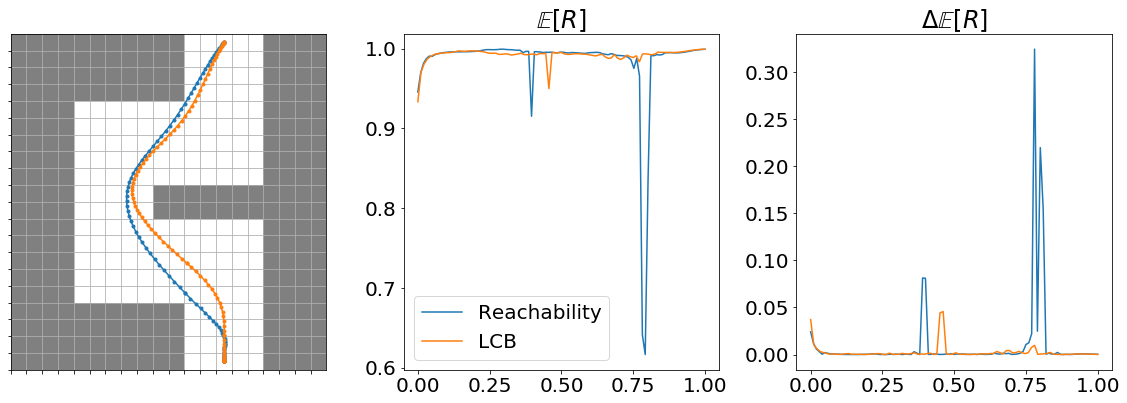

In [176]:
%matplotlib inline

getcontext().prec = 1024

matplotlib.rcParams.update({'font.size': 20})

fig, ((ax1, ax2, ax8)) = plt.subplots(1,3, figsize=(16, 6))
# fig.suptitle("Replanning evaluation")

for x1,y1,x2,y2 in [(-1.0, -1.0,  0.1, -0.6),(-1.0, -0.6, -0.6,  0.6),(-1.0,  0.6,  0.1,  1.0),( 0.6, -1.0,  1.0,  1.0),(-0.1, -0.1,  0.6,  0.1)]:
    verts = [
        (x1, y1), # left, bottom
        (x1, y2), # left, top
        (x2, y2), # right, top
        (x2, y1), # right, bottom
        (0., 0.), # ignored
    ]
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY,
    ]

    ax1.add_patch(patches.PathPatch(Path(verts, codes), facecolor='grey', lw=0))
        
ax1.set_xticks(np.arange(-1,1,0.1))
ax1.set_yticks(np.arange(-1,1,0.1))
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.grid()

# ax10.add_patch(patches.PathPatch(Path(verts1, codes), facecolor='grey', lw=0))
# ax10.add_patch(patches.PathPatch(Path(verts2, codes), facecolor='grey', lw=0))
# ax10.set_xticks(np.arange(-1,1,0.1))
# ax10.set_yticks(np.arange(-1,1,0.1))
# ax10.set_xlim([-1, 1])
# ax10.set_ylim([-1, 1])
# ax10.grid()

filenames = sorted(glob.glob("replanning_corridor/*.bag"))


cm_subsection = linspace(0, 1, len(filenames))
colors = [cm.jet(x) for x in cm_subsection]

def name2label(name):    
    if "ucb0_" in name:
        name = "Reachability"
    else:
        name = "LCB"
    return name

def plot_spline(ax, stats, name, rnd, random_color=False):
    if random_color:
        ax.plot(stats.trajectoryX, stats.trajectoryY, '.-', label=name2label(name))
    else:
        ax.plot(stats.trajectoryX, stats.trajectoryY, '.-', label=name2label(name))
        
for rnd, filename in enumerate(filenames):
    #if rnd != 7:
     #   continue
#     if rnd != 50:
#         continue
    
    #print "Evaluating trajectory %i (%s)..." % (rnd, filename)
    bag = rosbag.Bag(filename)
    stats = None
    for _, msg, _ in bag.read_messages(topics=['stats']):
        stats = msg
    bag.close()
    if stats is None:
        continue
        
#     start = 0
#     err0sBelief = []
#     err0sLogOdds = []
#     ax = plt.subplot(111)
#     for step in range(stats.step):
#         err0Belief = np.mean(np.array(stats.errorCompleteUpdatedBelief[start:start + stats.updatedVoxels[step]]))
#         err0sBelief.append(err0Belief)
#         err0LogOdds = np.mean(np.array(stats.errorCompleteUpdatedLogOdds[start:start + stats.updatedVoxels[step]]))
#         err0sLogOdds.append(err0LogOdds)
#         start += stats.updatedVoxels[step]
#     ax.plot(err0sBelief, label="SMAP")
#     ax.plot(err0sLogOdds, label="LogOdds")

#     if rnd == 5:
#         ax1.plot(stats.trajectoryX, stats.trajectoryY, label="T %i" % rnd, c=colors[rnd])
    plot_spline(ax1, stats, filename, rnd)
        
    steps = np.linspace(0, 1, len(stats.planningReachabilities))
    stds = stats.planningStds if hasattr(stats, "planningStds") else stats.planningVariances
    ax2.plot(steps, stats.planningReachabilities, '-', label=name2label(filename))
    
    if hasattr(stats, "replanningIterations"):
        print filename, stats.replanningIterations
        
        
    if hasattr(stats, "planningVelocities"):
        print filename, "Velocity:", np.mean(stats.planningVelocities)
        time = 0.
        for x, y, lx, ly, v in zip(stats.trajectoryX[1:], stats.trajectoryY[1:], stats.trajectoryX, stats.trajectoryY, stats.planningVelocities[1:]):
            l = np.sqrt((x-lx)**2. + (y-ly)**2.)
            time += l / v
        print filename, "Time:", time
#     steps = np.linspace(0, 1, (len(stds)))
#     ax3.plot(steps, stds, '-', c=colors[rnd])
    
#     if hasattr(stats, "planningFutureReachabilities"):
#         steps = np.linspace(0, 1, (len(stats.planningFutureReachabilities)))
#         ax5.plot(steps, stats.planningFutureReachabilities, '-', c=colors[rnd])
#         print filename, len(stats.planningFutureReachabilities)
#     if hasattr(stats, "planningFutureStds"):
#         steps = np.linspace(0, 1, (len(stats.planningFutureStds)-1))
#         ax6.plot(steps, stats.planningFutureStds[:-1], '-', c=colors[rnd])        
        
#     if hasattr(stats, "replanningIterations"):
#         print stats.replanningIterations
#         ax4.scatter([rnd], [stats.replanningIterations], c=colors[rnd])
        
    steps = np.linspace(0, 1, (len(stds)-1))
    ax8.plot(steps, np.abs(np.diff(stats.planningReachabilities)), '-')
    
ax2.set_title("$\mathbb{E}[R]$")
ax2.legend()
# ax3.set_title("$\sigma[R]$")
# ax4.set_title("Number of Replanning Iterations")
# ax4.set_xlim([0, len(filenames)-1])
# ax5.set_title("$\mathbb{E}[R^+]$")
# ax6.set_title("$\sigma[R^+]$")
ax8.set_title("$\Delta\mathbb{E}[R]$")
plt.tight_layout()
plt.savefig("replanning_corridor.png")